# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from datetime import datetime

# Set style for better visuals
plt.style.use('seaborn')

/tmp/ipykernel_24133/3166615292.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Dataset Loading

In [2]:
df = pd.read_csv('./dataset/bustabit.csv')

# EDA

In [3]:
df.head()

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20T19:44:19Z
1,10676217,3343882,znay22,3,NaN,NaN,NaN,1.40,2016-11-14T14:21:50Z
2,15577107,3374646,rrrrrrrr,4,1.33,3.0,1.44,3.15,2016-11-23T06:39:15Z
3,25732127,3429241,sanya1206,10,NaN,NaN,NaN,1.63,2016-12-08T18:13:55Z
4,17995432,3389174,ADM,50,1.50,1.4,25.70,2.29,2016-11-27T08:14:48Z


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         50000 non-null  int64  
 1   GameID     50000 non-null  int64  
 2   Username   50000 non-null  object 
 3   Bet        50000 non-null  int64  
 4   CashedOut  28734 non-null  float64
 5   Bonus      28734 non-null  float64
 6   Profit     28734 non-null  float64
 7   BustedAt   50000 non-null  float64
 8   PlayDate   50000 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 3.4+ MB


In [5]:
df.count()

Id           50000
GameID       50000
Username     50000
Bet          50000
CashedOut    28734
Bonus        28734
Profit       28734
BustedAt     50000
PlayDate     50000
dtype: int64

# Missing Values Analysis

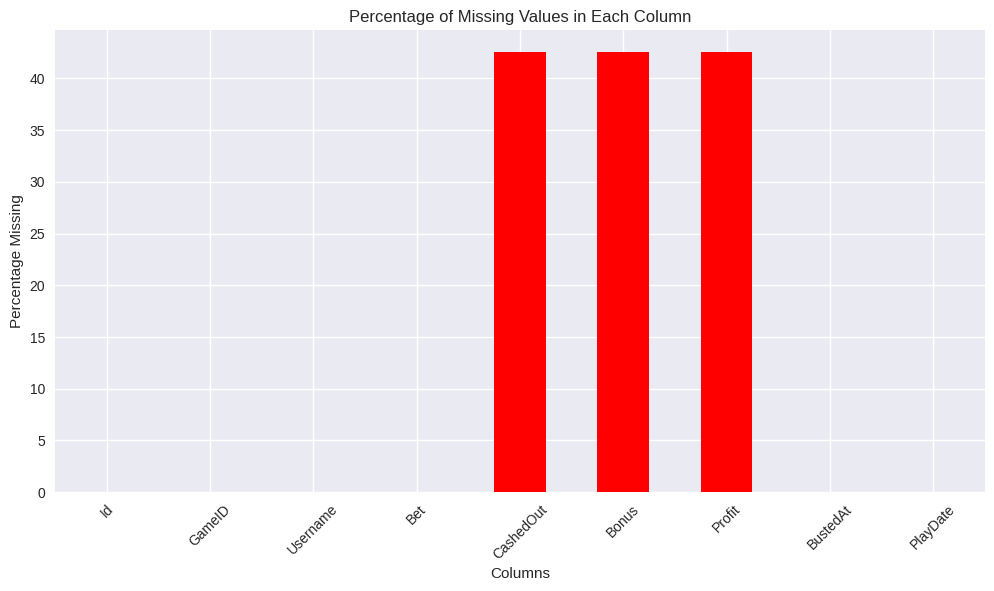

In [6]:
missing_data = df.isnull().sum() / len(df) * 100

plt.figure(figsize=(12, 6))
missing_data.plot(kind='bar', color='red')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Replacing NaN Values with 0 in DataFrame

In [7]:
df.fillna(0, inplace=True)

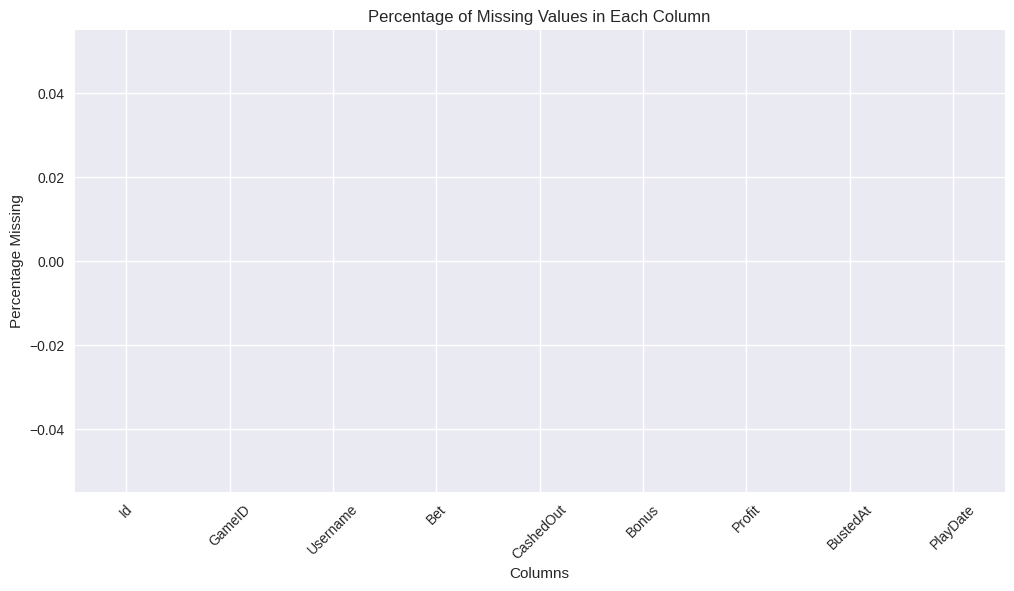

In [8]:
missing_data = df.isnull().sum() / len(df) * 100

plt.figure(figsize=(12, 6))
missing_data.plot(kind='bar', color='red')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Define Churn for Your Dataset

In [9]:
# Convert 'PlayDate' to datetime
df['PlayDate'] = pd.to_datetime(df['PlayDate'])

In [10]:
df.head(10)

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20 19:44:19+00:00
1,10676217,3343882,znay22,3,0.00,0.0,0.00,1.40,2016-11-14 14:21:50+00:00
2,15577107,3374646,rrrrrrrr,4,1.33,3.0,1.44,3.15,2016-11-23 06:39:15+00:00
3,25732127,3429241,sanya1206,10,0.00,0.0,0.00,1.63,2016-12-08 18:13:55+00:00
4,17995432,3389174,ADM,50,1.50,1.4,25.70,2.29,2016-11-27 08:14:48+00:00
5,14147823,3365723,afrod,2,0.00,0.0,0.00,1.04,2016-11-20 17:50:55+00:00
6,10802671,3344556,charles150,1,1.05,4.0,0.09,1.05,2016-11-14 18:52:58+00:00
7,6155532,3323151,antaresgold,8,0.00,0.0,0.00,1.13,2016-11-08 16:57:04+00:00
8,15421788,3373736,fluxxy,2000,1.20,0.0,400.00,9.14,2016-11-23 00:26:05+00:00
9,3387542,3311658,jim4beaver,1000,1.05,0.0,50.00,10.09,2016-11-05 10:32:34+00:00


In [11]:
# Find the last date in the dataset
latest_date = df['PlayDate'].max()

In [12]:
latest_date

Timestamp('2016-12-10 20:09:12+0000', tz='UTC')

In [13]:
# Group by player and find their last activity date
player_last_activity = df.groupby('Username')['PlayDate'].max().reset_index()

In [14]:
player_last_activity.head(10)

,Username,PlayDate
0,----------------,2016-11-03 20:26:24+00:00
1,--dilib--,2016-11-03 17:35:53+00:00
2,-31337-,2016-12-09 20:33:22+00:00
3,-Nothing-,2016-12-06 15:27:27+00:00
4,-Tachyon,2016-11-01 23:10:05+00:00
5,-Y-,2016-10-31 16:48:46+00:00
6,-ZYBERPH-,2016-11-18 12:17:08+00:00
7,-_-TUYUL-_-,2016-12-06 14:04:37+00:00
8,-__---,2016-12-08 20:49:55+00:00
9,-i_,2016-11-03 21:11:52+00:00


In [15]:
# Define churn threshold (e.g., 30 days)
churn_threshold_days = 4
player_last_activity['Churned'] = (latest_date - player_last_activity['PlayDate']) > pd.Timedelta(days=churn_threshold_days)

In [16]:
player_last_activity['Churned'] = (
    (latest_date - player_last_activity['PlayDate']) > pd.Timedelta(days=churn_threshold_days)
).astype(int)

In [17]:
player_last_activity.head(10)

,Username,PlayDate,Churned
0,----------------,2016-11-03 20:26:24+00:00,1
1,--dilib--,2016-11-03 17:35:53+00:00,1
2,-31337-,2016-12-09 20:33:22+00:00,0
3,-Nothing-,2016-12-06 15:27:27+00:00,1
4,-Tachyon,2016-11-01 23:10:05+00:00,1
5,-Y-,2016-10-31 16:48:46+00:00,1
6,-ZYBERPH-,2016-11-18 12:17:08+00:00,1
7,-_-TUYUL-_-,2016-12-06 14:04:37+00:00,1
8,-__---,2016-12-08 20:49:55+00:00,0
9,-i_,2016-11-03 21:11:52+00:00,1


In [18]:
# Count churned vs active players
churn_stats = player_last_activity['Churned'].value_counts(normalize=True) * 100
print("Churn Rate (%):")
print(churn_stats)

Churn Rate (%):
Churned
1    78.211617
0    21.788383
Name: proportion, dtype: float64


In [19]:
churn_counts = player_last_activity['Churned'].value_counts()
print(churn_counts)

Churned
1    3245
0     904
Name: count, dtype: int64


In [20]:
df.head()

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20 19:44:19+00:00
1,10676217,3343882,znay22,3,0.00,0.0,0.00,1.40,2016-11-14 14:21:50+00:00
2,15577107,3374646,rrrrrrrr,4,1.33,3.0,1.44,3.15,2016-11-23 06:39:15+00:00
3,25732127,3429241,sanya1206,10,0.00,0.0,0.00,1.63,2016-12-08 18:13:55+00:00
4,17995432,3389174,ADM,50,1.50,1.4,25.70,2.29,2016-11-27 08:14:48+00:00


### Visualization: Churn Rate Pie Chart

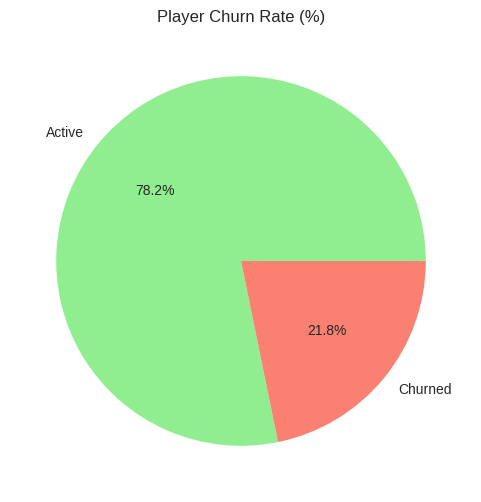

In [21]:
plt.figure(figsize=(6, 6))
plt.pie(churn_stats, labels=['Active', 'Churned'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Player Churn Rate (%)')
plt.show()

# Analyze Churned vs. Active Players

In [22]:
# Merge churn status with original data
df = df.merge(player_last_activity[['Username', 'Churned']], on='Username')

# Compare average bet amount
avg_bet_churned = df[df['Churned']]['Bet'].mean()
avg_bet_active = df[~df['Churned']]['Bet'].mean()

print(f"Average Bet (Churned): {avg_bet_churned:.2f}")
print(f"Average Bet (Active): {avg_bet_active:.2f}")

# Visualize
plt.figure(figsize=(8, 5))
plt.bar(['Churned', 'Active'], [avg_bet_churned, avg_bet_active], color=['salmon', 'lightgreen'])
plt.title('Average Bet Amount: Churned vs Active Players')
plt.ylabel('Average Bet')
plt.show()

### Compare BustedAt (Risk Tolerance)

# Time-Based Churn Analysis

In [23]:
# Extract month-year of last activity
player_last_activity['LastActivityMonth'] = player_last_activity['PlayDate'].dt.to_period('M')

# Count churns per month
monthly_churns = player_last_activity[player_last_activity['Churned']].groupby('LastActivityMonth').size()

# Plot
plt.figure(figsize=(12, 6))
monthly_churns.plot(kind='line', marker='o', color='red')
plt.title('Monthly Player Churn Trend')
plt.xlabel('Month')
plt.ylabel('Number of Churned Players')
plt.grid(True)
plt.show()

/tmp/ipykernel_24133/4162429337.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  player_last_activity['LastActivityMonth'] = player_last_activity['PlayDate'].dt.to_period('M')


KeyError: "None of [Index([1, 1, 0, 1, 1, 1, 1, 1, 0, 1,\n       ...\n       1, 1, 0, 1, 0, 1, 1, 1, 0, 1],\n      dtype='int64', length=4149)] are in the [columns]"

### Player Lifetime (Days Active Before Churning)

In [ ]:
# Calculate player lifetime (days between first and last bet)
player_lifetime = df.groupby('Username')['PlayDate'].agg(['min', 'max'])
player_lifetime['LifetimeDays'] = (player_lifetime['max'] - player_lifetime['min']).dt.days

# Compare churned vs active
churned_lifetime = player_lifetime[player_last_activity.set_index('Username')['Churned']]
active_lifetime = player_lifetime[~player_last_activity.set_index('Username')['Churned']]

plt.figure(figsize=(10, 6))
plt.hist(churned_lifetime['LifetimeDays'], bins=30, alpha=0.7, label='Churned', color='red')
plt.hist(active_lifetime['LifetimeDays'], bins=30, alpha=0.7, label='Active', color='green')
plt.title('Player Lifetime Distribution (Days)')
plt.xlabel('Days Active')
plt.ylabel('Number of Players')
plt.legend()
plt.show()

# Predictors of Churn

In [ ]:
avg_bonus_churned = df[df['Churned']]['Bonus'].mean()
avg_bonus_active = df[~df['Churned']]['Bonus'].mean()

plt.figure(figsize=(8, 5))
plt.bar(['Churned', 'Active'], [avg_bonus_churned, avg_bonus_active], color=['salmon', 'lightgreen'])
plt.title('Average Bonus Received: Churned vs Active Players')
plt.ylabel('Average Bonus')
plt.show()

### Did Profitability Affect Churn?

In [ ]:
avg_profit_churned = df[df['Churned']]['Profit'].mean()
avg_profit_active = df[~df['Churned']]['Profit'].mean()

plt.figure(figsize=(8, 5))
plt.bar(['Churned', 'Active'], [avg_profit_churned, avg_profit_active], color=['salmon', 'lightgreen'])
plt.title('Average Profit: Churned vs Active Players')
plt.ylabel('Average Profit')
plt.show()

# EDA on Username Column

## Identifying Top 10 Most Likely Churned Players

In [24]:
# Convert PlayDate to datetime
df['PlayDate'] = pd.to_datetime(df['PlayDate'])

# Get the latest date in the dataset
latest_date = df['PlayDate'].max()

In [25]:
# Group by player and calculate key metrics
player_activity = df.groupby('Username').agg(
    first_play=('PlayDate', 'min'),
    last_play=('PlayDate', 'max'),
    total_bets=('Id', 'count'),
    total_days_active=('PlayDate', lambda x: x.dt.normalize().nunique()),
    avg_bet=('Bet', 'mean')
).reset_index()

# Calculate days since last play
player_activity['days_since_last_play'] = (latest_date - player_activity['last_play']).dt.days

# Calculate total days in dataset
total_days_in_dataset = (df['PlayDate'].max() - df['PlayDate'].min()).days + 1

# Calculate inactivity ratio (higher = more likely churned)
player_activity['inactivity_ratio'] = player_activity['days_since_last_play'] / total_days_in_dataset

# Calculate activity frequency (bets per active day)
player_activity['bets_per_active_day'] = player_activity['total_bets'] / player_activity['total_days_active']

In [26]:
# Create a composite score for churn likelihood
player_activity['churn_score'] = (
    player_activity['days_since_last_play'] * 0.5 + 
    player_activity['inactivity_ratio'] * 0.3 + 
    (1 - player_activity['bets_per_active_day']/player_activity['bets_per_active_day'].max()) * 0.2
)

In [27]:
# Sort by churn score and get top 10
top_churn_players = player_activity.sort_values('churn_score', ascending=False).head(10)

# Format the output
top_churn_players = top_churn_players[[
    'Username', 
    'first_play', 
    'last_play', 
    'days_since_last_play',
    'total_bets',
    'total_days_active',
    'churn_score'
]]

# Convert dates to readable format
top_churn_players['first_play'] = top_churn_players['first_play'].dt.strftime('%Y-%m-%d')
top_churn_players['last_play'] = top_churn_players['last_play'].dt.strftime('%Y-%m-%d')

print("Top 10 Most Likely Churned Players:")
top_churn_players

Top 10 Most Likely Churned Players:


,Username,first_play,last_play,days_since_last_play,total_bets,total_days_active,churn_score
2195,boomtarat,2016-10-31,2016-10-31,40,1,1,20.470461
3803,tcc,2016-10-31,2016-10-31,40,1,1,20.470461
3792,tannerl22,2016-10-31,2016-10-31,40,1,1,20.470461
3769,sumrak,2016-10-31,2016-10-31,40,1,1,20.470461
698,GravityB,2016-10-31,2016-10-31,40,1,1,20.470461
3657,siro60,2016-10-31,2016-10-31,40,1,1,20.470461
3558,salongdartist,2016-10-31,2016-10-31,40,1,1,20.470461
817,Investinbtccoin,2016-10-31,2016-10-31,40,1,1,20.470461
978,KoopaWert,2016-10-31,2016-10-31,40,1,1,20.470461
1076,MAkSQWI,2016-10-31,2016-10-31,40,1,1,20.470461


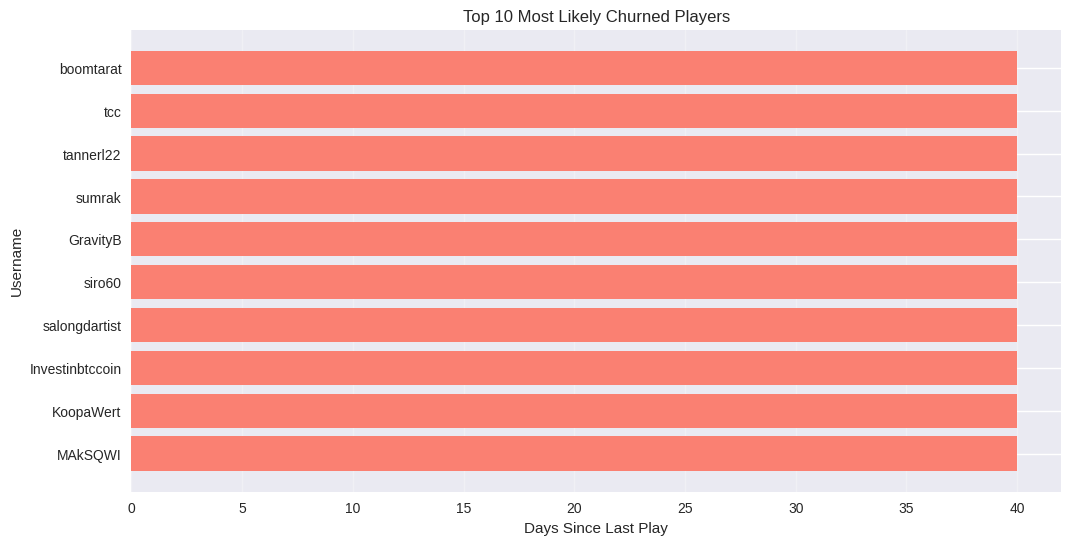

In [28]:
# Plot the top churned players
plt.figure(figsize=(12, 6))
plt.barh(top_churn_players['Username'], top_churn_players['days_since_last_play'], color='salmon')
plt.title('Top 10 Most Likely Churned Players')
plt.xlabel('Days Since Last Play')
plt.ylabel('Username')
plt.gca().invert_yaxis()  # Show highest at top
plt.grid(axis='x', alpha=0.3)
plt.show()

### Top 20 Most Active Players

In [ ]:
top_players = df['Username'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_players.plot(kind='bar', color='purple')
plt.title('Top 20 Most Active Players by Number of Bets')
plt.xlabel('Username')
plt.ylabel('Number of Bets')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
unique_username = df['Username'].unique()

In [ ]:
unique_username

In [ ]:
print(unique_username)

In [ ]:
unique_players = df['Username'].nunique()

In [ ]:
unique_players

# EDA on PlayDate Column

In [ ]:
df['PlayDate'] = pd.to_datetime(df['PlayDate'])

In [ ]:
start_date = df['PlayDate'].min()
end_date = df['PlayDate'].max()

print(f"Data starts on: {start_date}")
print(f"Data ends on: {end_date}")

In [ ]:
total_days = (end_date - start_date).days
total_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
total_years = total_days / 365.25  # Accounting for leap years

print(f"\nTotal time period covered:")
print(f"- {total_days} days")
print(f"- ~{total_months} months")
print(f"- ~{total_years:.1f} years")

In [ ]:
# Create figure
fig, ax = plt.subplots(figsize=(12, 3))

# Plot timeline
ax.plot([start_date, end_date], [0, 0], color='blue', linewidth=4, marker='|', markersize=15, markeredgewidth=2)

# Annotate dates
ax.text(start_date, 0.1, f"Start: {start_date.strftime('%Y-%m-%d')}", 
        ha='left', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
ax.text(end_date, 0.1, f"End: {end_date.strftime('%Y-%m-%d')}", 
        ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
ax.text((start_date + (end_date - start_date)/2), -0.15, 
        f"Total Duration: {total_days} days", 
        ha='center', va='top', fontsize=11, fontweight='bold')

# Styling
ax.set_yticks([])
ax.set_title('Dataset Time Range Coverage', pad=20, fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Game Frequency Over Time

In [ ]:
# Convert PlayDate to datetime
df['PlayDate'] = pd.to_datetime(df['PlayDate'])

# Resample by day
daily_games = df.resample('D', on='PlayDate').size()

plt.figure(figsize=(15, 6))
daily_games.plot(color='teal')
plt.title('Number of Games Played Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

# EDA on BustedAt Column

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['BustedAt'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of BustedAt Values')
plt.xlabel('BustedAt Multiplier')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# EDA on BET Column

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['Bet'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Bet Amounts')
plt.xlabel('Bet Amount')
plt.ylabel('Frequency')
plt.yscale('log')  # Use log scale if data is skewed
plt.grid(True)
plt.show()

In [ ]:
unique_bet = df['Bet'].nunique()

In [ ]:
print(unique_bet)

In [ ]:
total_bets_per_player = df.groupby('Username')['Bet'].sum() \
                         .reset_index() \
                         .sort_values('Bet', ascending=False)
total_bets_per_player.columns = ['Username', 'TotalBetAmount']

# Feature Engineering

In [ ]:
total_bets_per_player.head()

In [ ]:
player_stats = df.groupby('Username').agg(
    TotalBetAmount=('Bet', 'sum'),
    NumberOfBets=('Bet', 'count'),
    AverageBet=('Bet', 'mean'),
    MaxBet=('Bet', 'max')
).reset_index().sort_values('TotalBetAmount', ascending=False)

In [ ]:
player_stats = df.groupby('Username').agg(
    TotalBetAmount=('Bet', 'sum'),
    NumberOfBets=('Bet', 'count'),
    AverageBet=('Bet', 'mean'),
    MaxBet=('Bet', 'max'),
    MinBet=('Bet', 'min')
).reset_index().sort_values('TotalBetAmount', ascending=False)

In [ ]:
player_stats.head()

In [ ]:
total_bets_per_player = df.groupby('Username')['Bet'].sum().reset_index()

In [ ]:
total_bets_per_player.columns = ['Username', 'TotalBetAmount']

In [ ]:
total_bets_per_player

In [ ]:
total_bets_per_player.head()